In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creating time series data

In [3]:
# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


/home/sagnik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


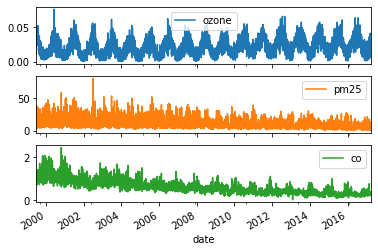

In [4]:
data = pd.read_csv('data/air_quality_data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [8]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


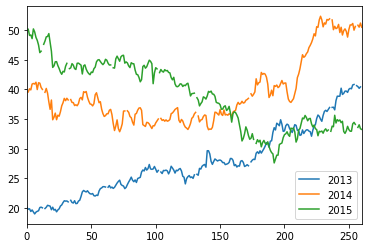

In [9]:
yahoo = pd.read_csv('data/stock_data/yahoo.csv')

yahoo.date = pd.to_datetime(yahoo.date)

yahoo.set_index('date', inplace=True)

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

### Set and change time series frequency
In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


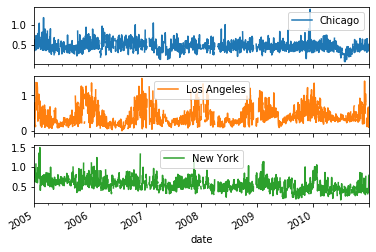

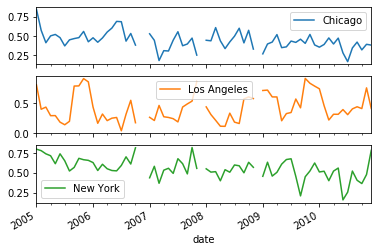

In [12]:
co = pd.read_csv('data/air_quality_data/co_cities.csv')

# Convert the date column to datetime64
co.date = pd.to_datetime(co.date)

# Set date column as index
co.set_index('date', inplace=True)

# Inspect data
print(co.info())

# Set data # set the frequency to calendar daily
co_d = co.asfreq('D')

# Plot the data
co_d.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the 'close' price
co.plot(subplots=True)
plt.show()


### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

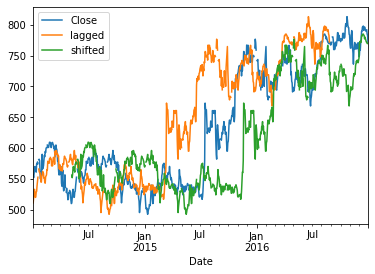

In [20]:
# Import data here
google = pd.read_csv('data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()


In [21]:
google

,Close,lagged,shifted
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN
...,...,...,...
2016-12-26,NaN,NaN,772.15
2016-12-27,791.55,NaN,772.08
2016-12-28,785.05,NaN,769.64


### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [22]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


### Plotting multi-period returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

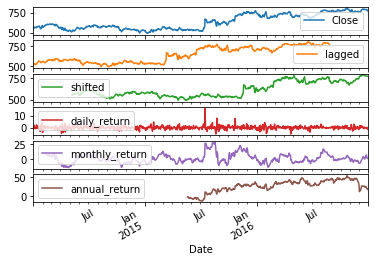

In [23]:
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()